# Rungeの現象
区間 $[-1,1]$ を $n$等分する点たちを標本点とするLagrange補間を
考える．

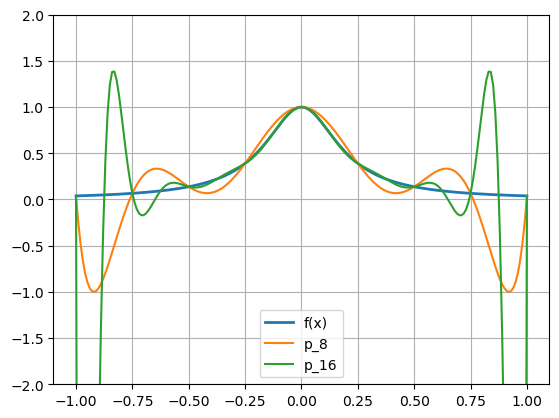

PyObject <matplotlib.legend.Legend object at 0x12fc9a0b0>

In [3]:
# 等分点に対するLagrange補間
function lagrange(f, n, x)
    a = collect(-1:2/n:1)  # 標本点を等分点に
    L(i,x) = prod([(j != i) ? (x-a[j])/(a[i]-a[j]) : 1 for j in 1:n+1])   
    return sum([f(a[i])*L(i,x) for i in 1:n+1]) 
end

using PyPlot
f(x) = 1/(1+25x^2)
t = -1:0.01:1  
plot(t, f.(t), lw = 2, label="f(x)")  # f(x)
plot(t, [lagrange(f, 8, x) for x in t], label="p_8") 
plot(t, [lagrange(f, 16, x) for x in t], label="p_16") 
#plot(t, [lagrange(f, 32, x) for x in t], label="p_32") 

ylim([-2,2])  #描画範囲を y ∈ [-2,2]に設定
grid()   # グリッド線表示
legend() # 凡例表示

# 【参考】基底関数の描画
Lagrange補間の基底関数をJuliaで描画する．
区間$[-1,1]$を16等分割した場合を考える．

Lagrange補間の基底関数$L_1(x), L_2(x), \ldots, L_{17}(x)$をJuliaで描画するコードは以下のとおりである．

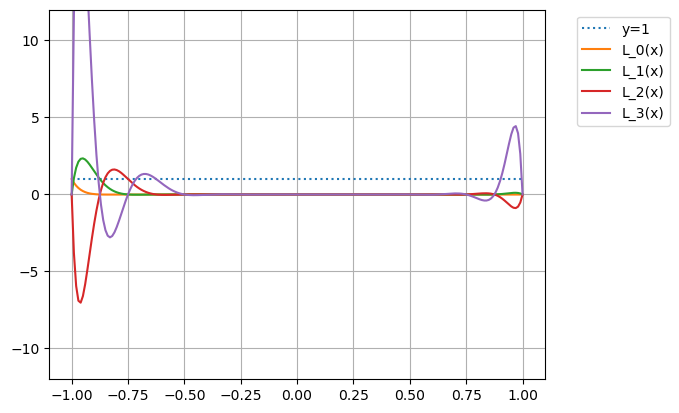

PyObject <matplotlib.legend.Legend object at 0x130782ce0>

In [10]:
# 基底関数の描画
n = 16
a = collect(-1:2/n:1)  
# 第i番目の標本点似対応する基底関数
L(i,x) = prod([(j != i) ? (x-a[j])/(a[i]-a[j]) : 1 for j in 1:n+1])   
t = -1:0.01:1  

# グラフの描画
plot(t, [1 for x in t], ls=":", label="y=1")
for i in 0:3
    plot(t, [L(i+1,x) for x in t], label="L_$i(x)") # 番号が1つずれる
end

ylim([-12,12])    # y軸方向の描画範囲を設定
grid()  # グリッド表示ON
legend(bbox_to_anchor=(1.05, 1), loc="upper left")    # 凡例

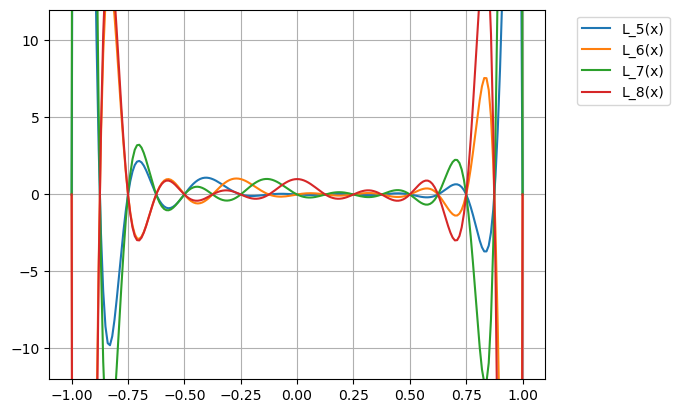

PyObject <matplotlib.legend.Legend object at 0x1308cb100>

In [11]:
for i in 5:8
    plot(t, [L(i+1,x) for x in t], label="L_$i(x)") # 番号が1つずれる
end
ylim([-12,12])    # y軸方向の描画範囲を設定
grid()  # グリッド表示ON
legend(bbox_to_anchor=(1.05, 1), loc="upper left")    # 凡例

両端に近い標本点に対応する基底関数（$L_1，L_2$）は比較的おとなしい関数形をしているが，
中心に近い基底関数（$L_7, L_8$）に関しては両端に近づくにつれて非常に大きな振動が観察される．
このようなことは実際に描画してみないと気付きにくい．